In [1]:
!pip install docx2txt
!pip install xlrd

  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3966 sha256=50eedff5b520c36ced76eaf3662cd60e379e4b8ab3d3086841f651a4b7e1cdd0
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt
     |████████████████████████████████| 96 kB 947 kB/s 


In [2]:
# importing the packages
import pandas as pd
import numpy as np
import docx2txt

In [3]:
# Import the data
doc2 = pd.read_excel("../input/gm-dataset/GlicemiaMisurazioni (6).xls",header=None)

In [4]:
my_text = docx2txt.process("../input/gm-dataset/Smt_-Manju-Agarwal.docx")

In [5]:
print(my_text[:1000])

Smt. Manju Agarwal

# 12

ID	Time	Record Type	Historic Glucose (mg/dL)

53028	2021/07/13 21:49	0	155

53029	2021/07/13 22:04	0	177

53030	2021/07/13 22:19	0	187

53031	2021/07/13 22:34	0	188

53032	2021/07/13 22:49	0	198

53033	2021/07/13 23:04	0	214

53034	2021/07/13 23:19	0	212

53035	2021/07/13 23:34	0	186

53036	2021/07/13 23:49	0	168

53037	2021/07/14 00:04	0	157

53038	2021/07/14 00:19	0	144

53039	2021/07/14 00:34	0	134

53040	2021/07/14 00:49	0	122

53041	2021/07/14 01:04	0	100

53042	2021/07/14 01:19	0	88

53043	2021/07/14 01:34	0	85

53044	2021/07/14 01:49	0	83

53045	2021/07/14 02:04	0	86

53046	2021/07/14 02:19	0	86

53047	2021/07/14 02:34	0	89

53048	2021/07/14 02:49	0	97

53049	2021/07/14 03:04	0	104

53050	2021/07/14 03:19	0	103

53051	2021/07/14 03:34	0	96

53052	2021/07/14 03:49	0	98

53053	2021/07/14 04:04	0	101

53054	2021/07/14 04:19	0	93

53055	2021/07/14 04:34	0	91

53056	2021/07/14 04:49	0	96

53057	2021/07/14 05:04	0	87

53058	2021/07/14 05:19	0	89

53059	2021/0

In [6]:
(54335-53028)*4

5228

In [7]:
def preprocess_data(text):
    # since the data is needed from the 2nd row there are going to be some skips
    columns = ["ID","TimeRecord" ,"Type","Historic Glucose (mg/dL)"]
    start = "53028"
    s = text[text.find(start):]
    s=s.replace("\n\n",'\t')
    s=s.split("\t")
    for i in range(len(s)):
        s[i] = s[i].replace('\n','')
        s[i] = s[i].replace('\t','')
    s=np.array(s)
    s=s.reshape(-1,4)
    df=pd.DataFrame(columns=columns,data=s)
    return df



In [8]:
doc1_data = preprocess_data(my_text)

In [9]:
doc2[0][0]

'5;27/07/2021 20.55.30;1627399530;;;249;259;4;3;MH003FZ82W;;;;;'

In [10]:
# Getting the data from the second excel file

def get_xls_data(data) :
    all_data = []
    for i in data :
        split = i.split(";")
        date = split[1].split(" ")[0]
        time = split[1].split(" ")[1]
        timerecord = split[1]
        glucose_1 = split[5]
        glusose_2 = split[6]
        all_data.append([date,time,timerecord,glucose_1,glusose_2])
    df=pd.DataFrame(columns = ["Date","Time","TimeRecord","Glucose2","Glucose3"],data=all_data)
    return df
        

In [11]:
doc2_data = get_xls_data(doc2[0])

doc2_data[["Glucose2","Glucose3"]] = doc2_data[["Glucose2","Glucose3"]].apply(pd.to_numeric)

In [12]:
doc1_data[['Date','Time']] = doc1_data.TimeRecord.str.split(expand=True) 


doc1_data["Historic Glucose (mg/dL)"] = doc1_data["Historic Glucose (mg/dL)"].apply(pd.to_numeric)
doc1_data

,ID,TimeRecord,Type,Historic Glucose (mg/dL),Date,Time
0,53028,2021/07/13 21:49,0,155,2021/07/13,21:49
1,53029,2021/07/13 22:04,0,177,2021/07/13,22:04
2,53030,2021/07/13 22:19,0,187,2021/07/13,22:19
3,53031,2021/07/13 22:34,0,188,2021/07/13,22:34
4,53032,2021/07/13 22:49,0,198,2021/07/13,22:49
...,...,...,...,...,...,...
1303,54331,2021/07/27 11:34,0,252,2021/07/27,11:34
1304,54332,2021/07/27 11:49,0,256,2021/07/27,11:49
1305,54333,2021/07/27 12:04,0,253,2021/07/27,12:04
1306,54334,2021/07/27 12:19,0,235,2021/07/27,12:19


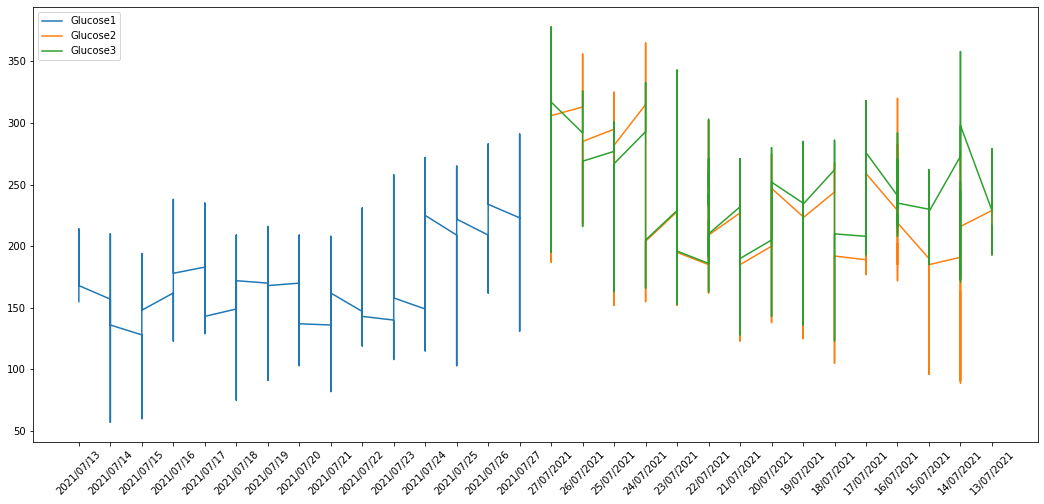

In [13]:
# Plotting the data importing the libraries

import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))

plt.plot(doc1_data["Date"],doc1_data["Historic Glucose (mg/dL)"],label="Glucose1")
plt.plot(doc2_data["Date"],doc2_data["Glucose2"],label="Glucose2")
plt.plot(doc2_data["Date"],doc2_data["Glucose3"],label="Glucose3")
plt.legend(loc="upper left")

plt.xticks(rotation=45) ;
plt.show()

In [14]:
# Importing the datetime package
import datetime

# Converting the time to datetime
def make_it_time(data,col="TimeRecord",s=False) :
    vals = data[col].values
    new_vals = []
    for i in vals :
        if s :
            date_time_obj = datetime.datetime.strptime(i, '%d/%m/%Y %H.%M.%S')
        else:
            date_time_obj = datetime.datetime.strptime(i, '%Y/%m/%d %H:%M')
        new_vals.append(date_time_obj)
    return new_vals

doc1_data["Time"] = make_it_time(doc1_data)
doc2_data["Time"] = make_it_time(doc2_data,s=True)

In [15]:
doc2_data

,Date,Time,TimeRecord,Glucose2,Glucose3
0,27/07/2021,2021-07-27 20:55:30,27/07/2021 20.55.30,249.0,259.0
1,27/07/2021,2021-07-27 20:40:30,27/07/2021 20.40.30,258.0,268.0
2,27/07/2021,2021-07-27 20:25:30,27/07/2021 20.25.30,257.0,267.0
3,27/07/2021,2021-07-27 20:10:30,27/07/2021 20.10.30,248.0,258.0
4,27/07/2021,2021-07-27 20:07:30,27/07/2021 20.07.30,248.0,258.0
...,...,...,...,...,...
1459,13/07/2021,2021-07-13 22:10:30,13/07/2021 22.10.30,215.0,215.0
1460,13/07/2021,2021-07-13 21:55:30,13/07/2021 21.55.30,193.0,193.0
1461,13/07/2021,2021-07-13 21:40:30,13/07/2021 21.40.30,197.0,197.0
1462,13/07/2021,2021-07-13 21:25:30,13/07/2021 21.25.30,205.0,205.0


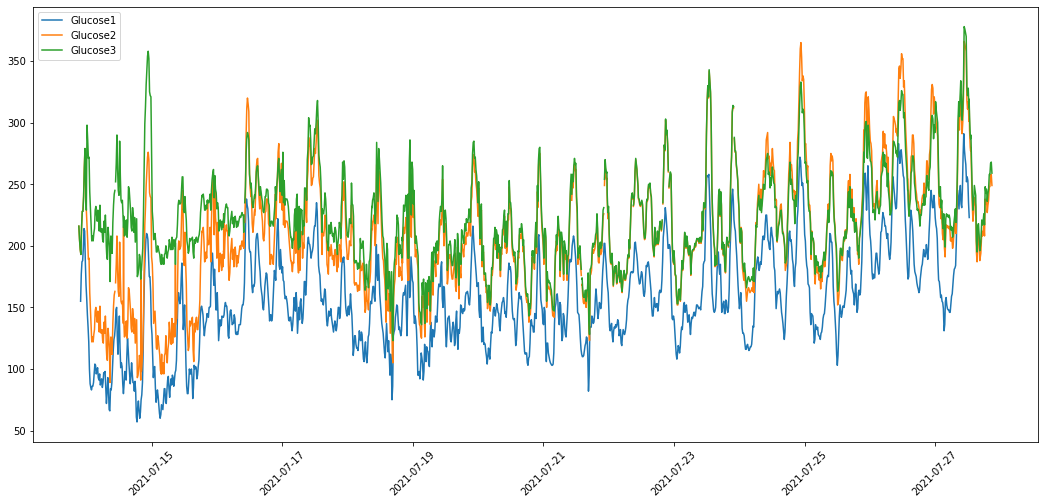

In [16]:
# Plotting the data importing the libraries

import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))

plt.plot(doc1_data["Time"],doc1_data["Historic Glucose (mg/dL)"],label="Glucose1")
plt.plot(doc2_data["Time"],doc2_data["Glucose2"],label="Glucose2")
plt.plot(doc2_data["Time"],doc2_data["Glucose3"],label="Glucose3")
plt.legend(loc="upper left")

plt.xticks(rotation=45) ;
plt.show()